# Homework 10: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [56]:
library(tidyverse)
library(dplyr)

In [2]:
simulateData <- function(n, beta_0, beta_1, beta_2, beta_3){
    x <- rnorm(n)
    y_no_noise <- beta_0 + beta_1*x + beta_2*x^2 + beta_3*x^3  
    noise <- rnorm(n)
    y <- y_no_noise + noise
    
    print(paste('betas 0-3:', beta_0, beta_1, beta_2, beta_3))
    
    return(data.frame(x, y))
}

simulateddata <- simulateData(100, rnorm(1), rnorm(1), rnorm(1), rnorm(1)) 
head(simulateddata)
dim(simulateddata)

#confused about where the x^4 - x^10 are supposed to come from.  Should I add them to my dataset here?  
#Even though they have no influence on Y (they are not used to directly predict Y in the simulate data function) in the question setup?  
#Or are they and their influence the model of increasing complexity added when I call regsubsets()?

#I figured out the issue



[1] "betas 0-3: -0.467674551346588 1.61312448147828 -0.701204064326612 -1.45948492762356"


,x,y
,<dbl>,<dbl>
1,0.2258760,1.1267487
2,1.3639373,-3.6416493
3,0.4338875,0.7695059
4,0.9289158,0.4960574
5,1.7803243,-6.6704904
6,0.9931648,-1.9890125


[1] 100   2

b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

For this you will need to install and load the _leaps_ library.

In [40]:
install.packages('leaps')


The downloaded binary packages are in
	/var/folders/9x/yng26nj50sq1bzz3bjr6bgkm0000gn/T//RtmpyiWnML/downloaded_packages


In [4]:
library(leaps)

In [6]:
regfit.full <- regsubsets(y~ poly(x, 10, raw = T), simulateddata, nvmax= 10)
regfit.summary <- summary(regfit.full)
regfit.summary
attributes(regfit.summary)

Subset selection object
Call: regsubsets.formula(y ~ poly(x, 10, raw = T), simulateddata, nvmax = 10)
10 Variables  (and intercept)
                       Forced in Forced out
poly(x, 10, raw = T)1      FALSE      FALSE
poly(x, 10, raw = T)2      FALSE      FALSE
poly(x, 10, raw = T)3      FALSE      FALSE
poly(x, 10, raw = T)4      FALSE      FALSE
poly(x, 10, raw = T)5      FALSE      FALSE
poly(x, 10, raw = T)6      FALSE      FALSE
poly(x, 10, raw = T)7      FALSE      FALSE
poly(x, 10, raw = T)8      FALSE      FALSE
poly(x, 10, raw = T)9      FALSE      FALSE
poly(x, 10, raw = T)10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 poly(x, 10, raw = T)3
1  ( 1 )  " "                   " "                   " "                  
2  ( 1 )  "*"                   " "                   "*"                  
3  ( 1 )  "*"                   "*"                   "*"                  
4  ( 1 )  "*"   

$names
[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"   

$class
[1] "summary.regsubsets"

c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model. 

In [106]:
#I figured out what I was doing wrong the first time.  
#I was trying to generate x-x^10 during my data creation, and did not use the poly() function when running regsubsets().

In [7]:
numvar = 1:length(regfit.summary$rss) #list of variable numbers 1-10 for x - x^10
allfalse = rep(FALSE,length(regfit.summary$rss)) #list of falses to start determining model of best fit
numvar
allfalse

[1]  1  2  3  4  5  6  7  8  9 10

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

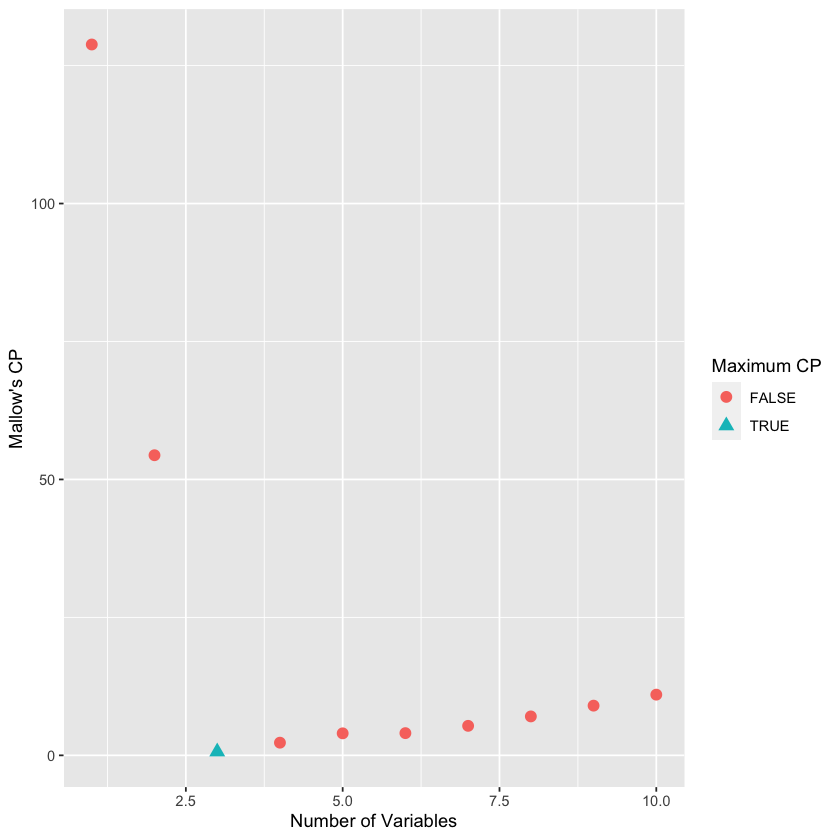

In [10]:
#Mallows' Cp

cp.df <- data.frame(numvar = numvar, cp <- regfit.summary$cp, mincp = allfalse)
cp.df$mincp[which.min(regfit.summary$cp)] <- TRUE
ggplot(cp.df,aes(x= numvar,y= cp,shape= mincp,col= mincp)) + 
     geom_point(size= 3) +  
     labs(x= "Number of Variables", y= "Mallow's CP", color= "Maximum CP", shape= "Maximum CP")


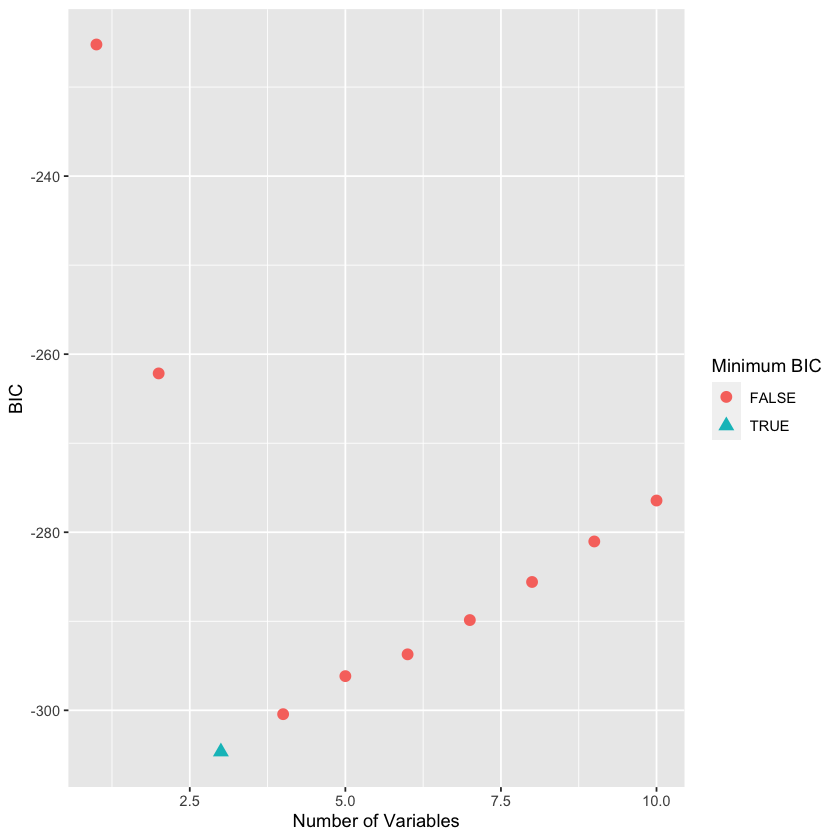

In [11]:
#BIC

bic.df <- data.frame(numvar= numvar, bic <- regfit.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(regfit.summary$bic)] <- TRUE
ggplot(bic.df,aes(x= numvar, y= bic, shape= minbic, col= minbic)) + 
    geom_point(size= 3) +  
    labs(x= "Number of Variables", y= "BIC", color= "Minimum BIC", shape= "Minimum BIC")

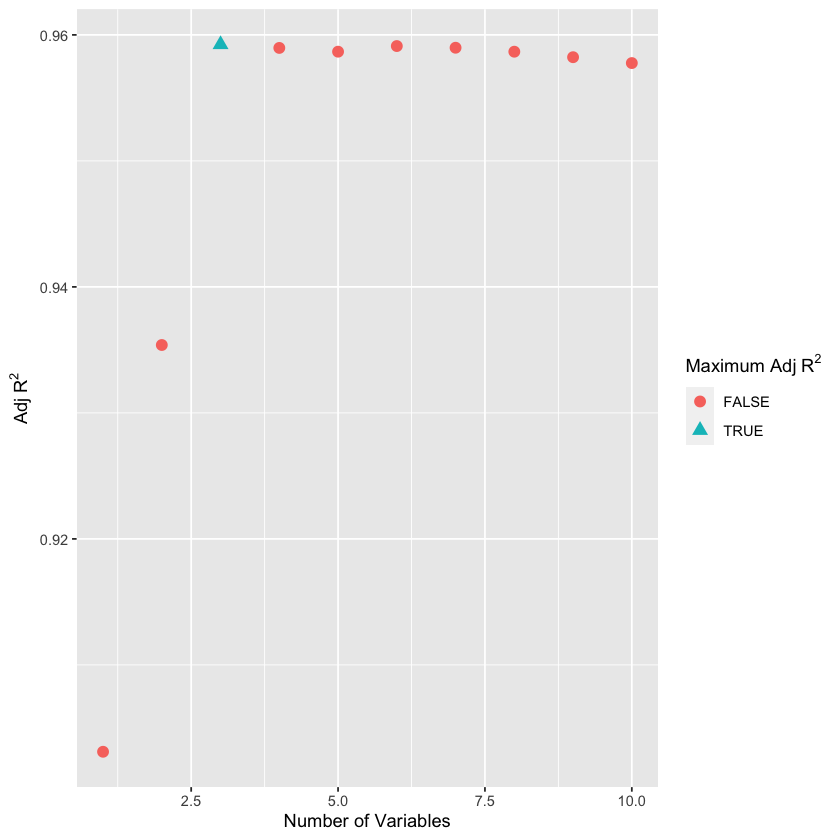

In [12]:
#R^2

adjr2.df <- data.frame(numvar= numvar, adjr2 <- regfit.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(regfit.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x= numvar,y= adjr2,shape= maxadjr2,col= maxadjr2)) + 
    geom_point(size= 3) +  
    labs(x= "Number of Variables", y= 'Adj'~R^2, color= 'Maximum Adj'~R^2, shape= 'Maximum Adj'~R^2)

> Based on the BIC and Mallow's CP, the model with 3 predictor variables appears to be the most effective for predicting Y. 

> The most effective model includes: x, x^2, and x^3

> The coefficients for this model are:



In [33]:

coef(regfit.full, 3)

(Intercept) poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 
           -0.3913459             1.5910186            -0.6405202 
poly(x, 10, raw = T)3 
           -1.4671791

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model. 

a) Forward stepwise selection:

In [115]:
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [14]:
regfit.stepwiseforward <- regsubsets(y~ poly(x, 10, raw = T), data= simulateddata, method = 'forward', nvmax = 10)
regfitforward.summary <- summary(regfit.stepwiseforward)
regfitforward.summary
attributes(regfitforward.summary)



Subset selection object
Call: regsubsets.formula(y ~ poly(x, 10, raw = T), data = simulateddata, 
    method = "forward", nvmax = 10)
10 Variables  (and intercept)
                       Forced in Forced out
poly(x, 10, raw = T)1      FALSE      FALSE
poly(x, 10, raw = T)2      FALSE      FALSE
poly(x, 10, raw = T)3      FALSE      FALSE
poly(x, 10, raw = T)4      FALSE      FALSE
poly(x, 10, raw = T)5      FALSE      FALSE
poly(x, 10, raw = T)6      FALSE      FALSE
poly(x, 10, raw = T)7      FALSE      FALSE
poly(x, 10, raw = T)8      FALSE      FALSE
poly(x, 10, raw = T)9      FALSE      FALSE
poly(x, 10, raw = T)10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 poly(x, 10, raw = T)3
1  ( 1 )  " "                   " "                   " "                  
2  ( 1 )  " "                   " "                   " "                  
3  ( 1 )  " "                   "*"                   " "      

$names
[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"   

$class
[1] "summary.regsubsets"

In [15]:
numvar = 1:length(regfitforward.summary$rss) #list of variable numbers 1-10 for x - x^10
allfalse = rep(FALSE,length(regfitforward.summary$rss)) #list of falses to start determining model of best fit
numvar
allfalse

[1]  1  2  3  4  5  6  7  8  9 10

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

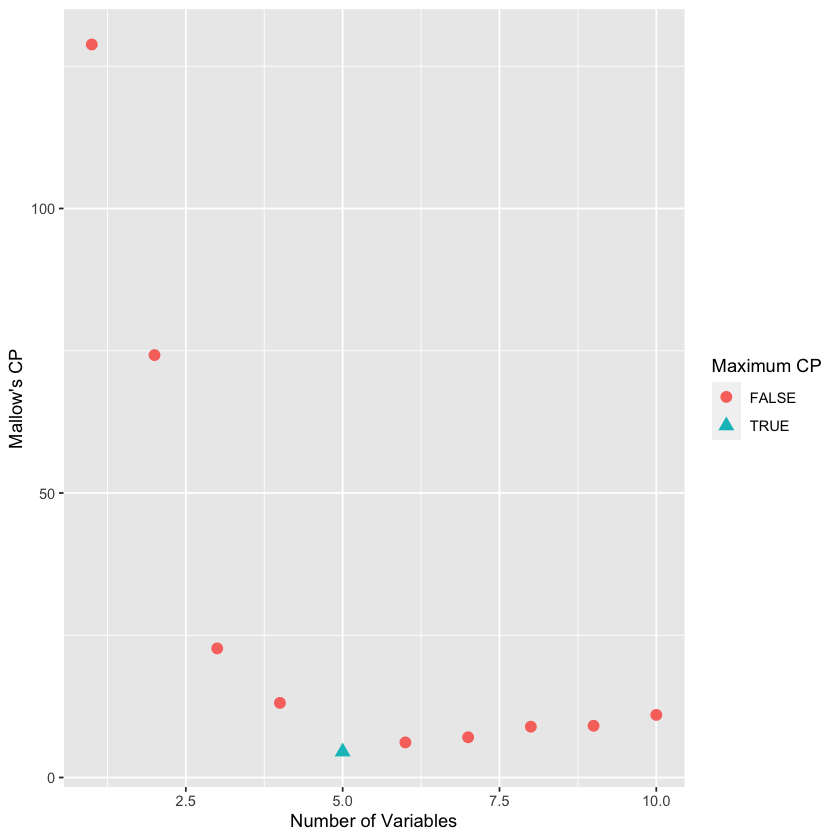

In [16]:
#Mallows' Cp

cp.df <- data.frame(numvar = numvar, cp <- regfitforward.summary$cp, mincp = allfalse)
cp.df$mincp[which.min(regfitforward.summary$cp)] <- TRUE
ggplot(cp.df,aes(x= numvar,y= cp,shape= mincp,col= mincp)) + 
     geom_point(size= 3) +  
     labs(x= "Number of Variables", y= "Mallow's CP", color= "Maximum CP", shape= "Maximum CP")

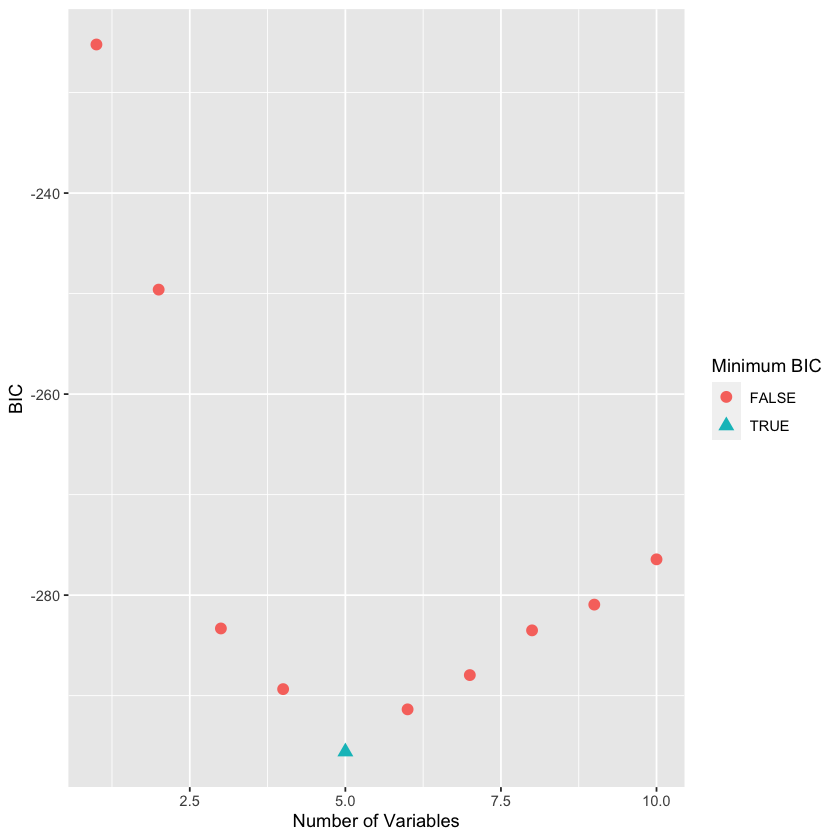

In [17]:
#BIC

bic.df <- data.frame(numvar= numvar, bic <- regfitforward.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(regfitforward.summary$bic)] <- TRUE
ggplot(bic.df,aes(x= numvar, y= bic, shape= minbic, col= minbic)) + 
    geom_point(size= 3) +  
    labs(x= "Number of Variables", y= "BIC", color= "Minimum BIC", shape= "Minimum BIC")

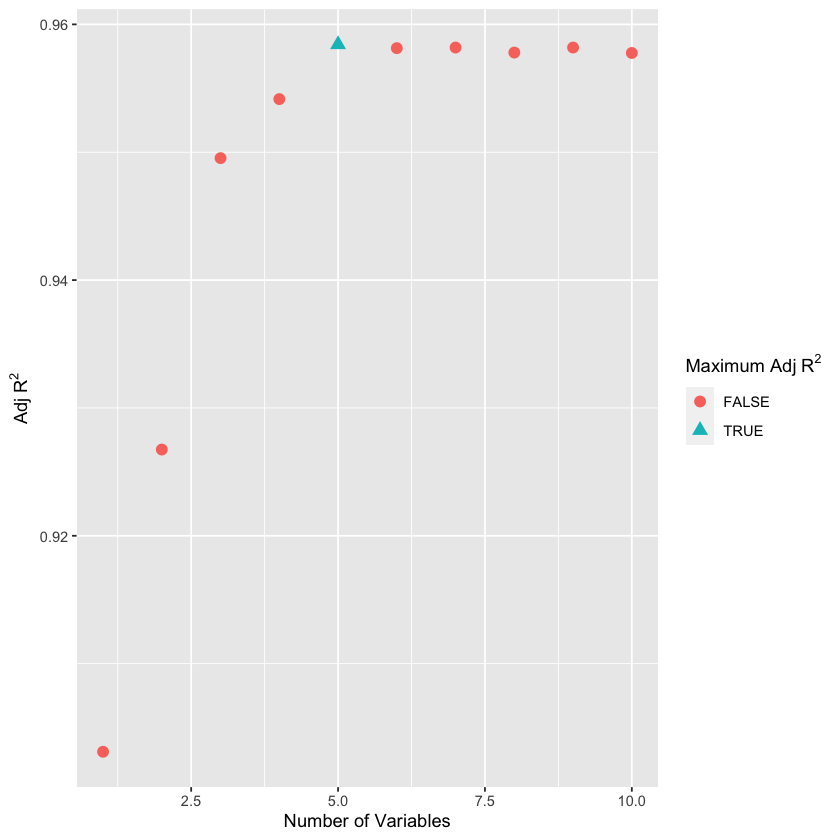

In [18]:
#R^2

adjr2.df <- data.frame(numvar= numvar, adjr2 <- regfitforward.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(regfitforward.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x= numvar,y= adjr2,shape= maxadjr2,col= maxadjr2)) + 
    geom_point(size= 3) +  
    labs(x= "Number of Variables", y= 'Adj'~R^2, color= 'Maximum Adj'~R^2, shape= 'Maximum Adj'~R^2)

>according to the Mallows' cp, BIC, and the adjusted r^2, the model with 5 variables appears to best predict Y.  

> This model includes the variables x, x^2, x^3, x^5, x^7


In [32]:
coef(regfit.stepwiseforward, 5)

(Intercept) poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 
         -0.379104858           1.576233098          -0.658391200 
poly(x, 10, raw = T)3 poly(x, 10, raw = T)5 poly(x, 10, raw = T)7 
         -1.411417269          -0.024382811           0.002163506

b) Backwards stepwise selection:

In [19]:
regfit.stepwisebackward <- regsubsets(y~ poly(x, 10, raw = T), data= simulateddata, method = 'backward', nvmax = 10)
regfitbackward.summary <- summary(regfit.stepwisebackward)
regfitbackward.summary
attributes(regfitbackward.summary)





Subset selection object
Call: regsubsets.formula(y ~ poly(x, 10, raw = T), data = simulateddata, 
    method = "backward", nvmax = 10)
10 Variables  (and intercept)
                       Forced in Forced out
poly(x, 10, raw = T)1      FALSE      FALSE
poly(x, 10, raw = T)2      FALSE      FALSE
poly(x, 10, raw = T)3      FALSE      FALSE
poly(x, 10, raw = T)4      FALSE      FALSE
poly(x, 10, raw = T)5      FALSE      FALSE
poly(x, 10, raw = T)6      FALSE      FALSE
poly(x, 10, raw = T)7      FALSE      FALSE
poly(x, 10, raw = T)8      FALSE      FALSE
poly(x, 10, raw = T)9      FALSE      FALSE
poly(x, 10, raw = T)10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          poly(x, 10, raw = T)1 poly(x, 10, raw = T)2 poly(x, 10, raw = T)3
1  ( 1 )  " "                   " "                   "*"                  
2  ( 1 )  "*"                   " "                   "*"                  
3  ( 1 )  "*"                   " "                   "*"    

$names
[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"   

$class
[1] "summary.regsubsets"

In [20]:
numvar = 1:length(regfitbackward.summary$rss) #list of variable numbers 1-10 for x - x^10
allfalse = rep(FALSE,length(regfitbackward.summary$rss)) #list of falses to start determining model of best fit
numvar
allfalse

[1]  1  2  3  4  5  6  7  8  9 10

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

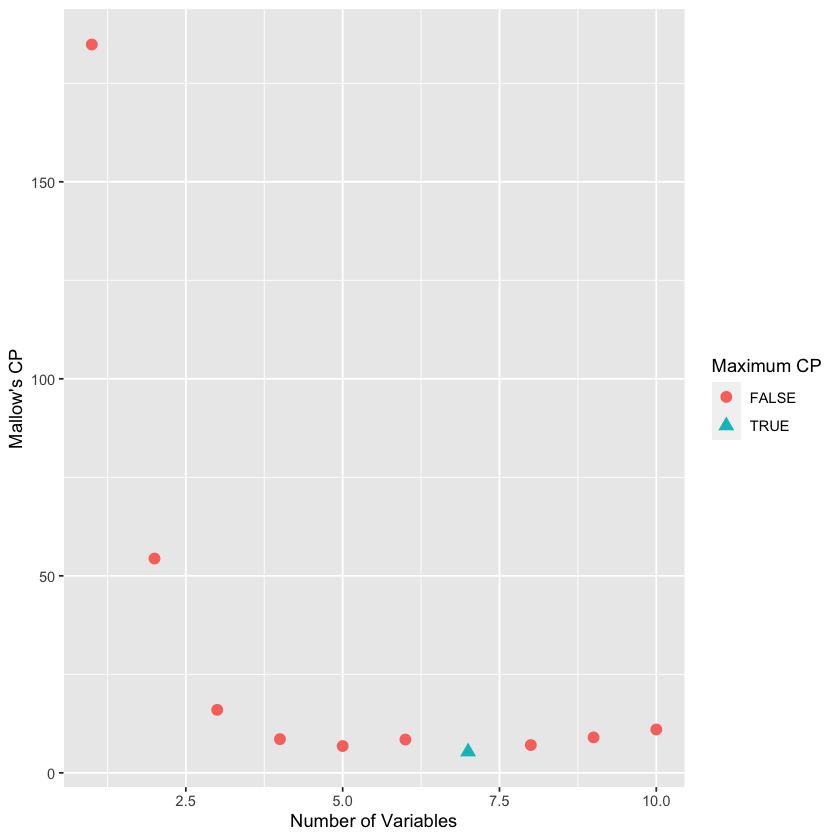

In [21]:
#Mallows' Cp

cp.df <- data.frame(numvar = numvar, cp <- regfitbackward.summary$cp, mincp = allfalse)
cp.df$mincp[which.min(regfitbackward.summary$cp)] <- TRUE
ggplot(cp.df,aes(x= numvar,y= cp,shape= mincp,col= mincp)) + 
     geom_point(size= 3) +  
     labs(x= "Number of Variables", y= "Mallow's CP", color= "Maximum CP", shape= "Maximum CP")

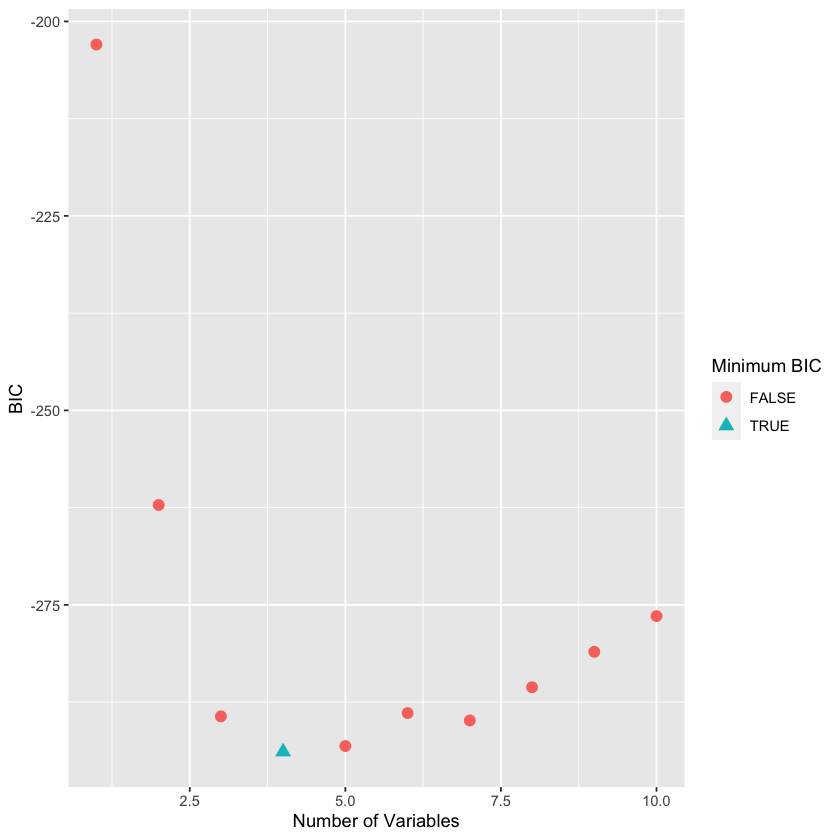

In [22]:
#BIC

bic.df <- data.frame(numvar= numvar, bic <- regfitbackward.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(regfitbackward.summary$bic)] <- TRUE
ggplot(bic.df,aes(x= numvar, y= bic, shape= minbic, col= minbic)) + 
    geom_point(size= 3) +  
    labs(x= "Number of Variables", y= "BIC", color= "Minimum BIC", shape= "Minimum BIC")

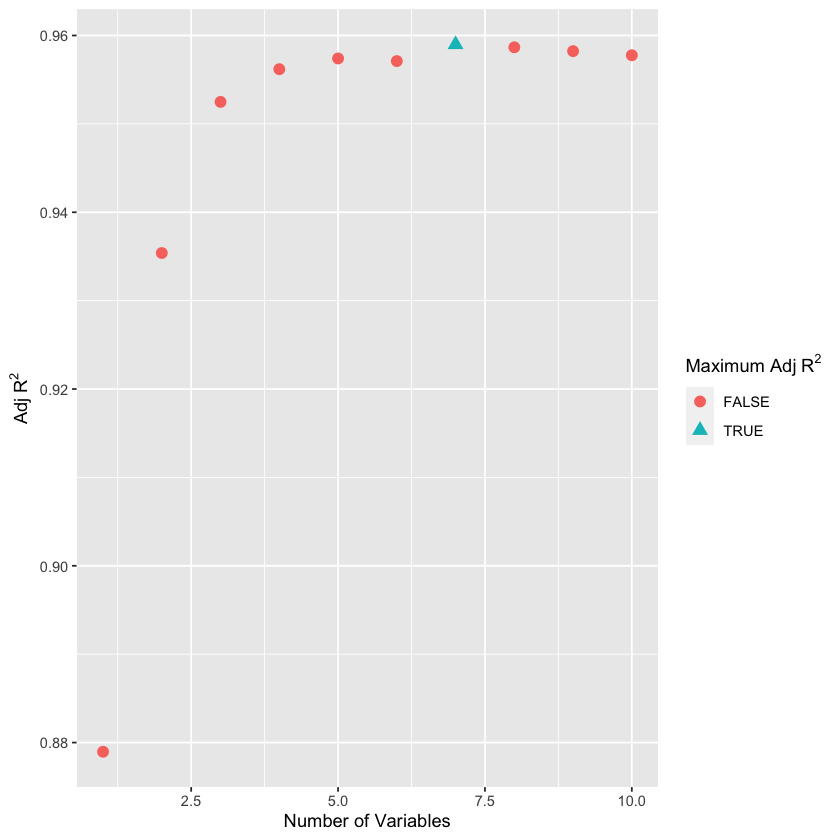

In [23]:
#R^2

adjr2.df <- data.frame(numvar= numvar, adjr2 <- regfitbackward.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(regfitbackward.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x= numvar,y= adjr2,shape= maxadjr2,col= maxadjr2)) + 
    geom_point(size= 3) +  
    labs(x= "Number of Variables", y= 'Adj'~R^2, color= 'Maximum Adj'~R^2, shape= 'Maximum Adj'~R^2)

>again, according to the Mallows' cp, and the adjusted r^2, the model with seven variables appears to best predict Y.  

> this model includes the variables: x, x^3, x^4, x^6, x^7, x^8, x^9

> According to the BIC, the model with 4 coefficients appears to be the best fit.
> This model includes x, x^3, x^4, x^6


In [31]:

coef(regfit.stepwisebackward, 7)
coef(regfit.stepwisebackward, 4)

(Intercept) poly(x, 10, raw = T)1 poly(x, 10, raw = T)3 
          -0.38525082            1.28297618           -0.96398992 
poly(x, 10, raw = T)4 poly(x, 10, raw = T)6 poly(x, 10, raw = T)7 
          -1.32915888            0.63272731           -0.12105303 
poly(x, 10, raw = T)8 poly(x, 10, raw = T)9 
          -0.07882625            0.02080997

(Intercept) poly(x, 10, raw = T)1 poly(x, 10, raw = T)3 
          -0.61308321            1.67884732           -1.51933158 
poly(x, 10, raw = T)4 poly(x, 10, raw = T)6 
          -0.24268868            0.02119651

c) Compare your results from parts a and b with those of question 1.

Each of these model fitting methods returned a different preferred model.  Question 1 (standard method) suggests that the model with 3 variables is the most effective.  However, forward stepwise selection suggests that the model with 5 variables is most effective, and backward stepwise selection suggests that the models with 7 variables (Mallows' CP and r^2) or 4 variables (BIC) are most effective.  

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset. 

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$ 

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [42]:
simulateData2 <- function(n, beta){
    x <- rnorm(n)
    y_no_noise <- beta * x 
    noise <- rnorm(n)
    y <- y_no_noise + noise
    
    print(paste('beta:', beta))
    
    return(data.frame(x, y))
}

train=sample(x = 1000, size = 100)  # sample 196 indices from the vector 1:392

simulateddata2 <- simulateData2(1000, rnorm(1, 0))
head(simulateddata2)
dim(simulateddata2)


[1] "beta: -0.716921087159749"


,x,y
,<dbl>,<dbl>
1,-0.1419326,0.2030809
2,0.2836140,0.6630129
3,0.2508063,-1.5872181
4,0.2282554,-2.4787550
5,1.7635415,0.4659426
6,-0.9422613,0.4345370


[1] 1000    2

b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

In [43]:
bestsubset.training <- regsubsets(y~ poly(x, 20, raw = T), data= simulateddata2, subset= train, nvmax = 20)
training.summary <- summary(bestsubset.training)
training.summary
attributes(training.summary)




Subset selection object
Call: regsubsets.formula(y ~ poly(x, 20, raw = T), data = simulateddata2, 
    subset = train, nvmax = 20)
20 Variables  (and intercept)
                       Forced in Forced out
poly(x, 20, raw = T)1      FALSE      FALSE
poly(x, 20, raw = T)2      FALSE      FALSE
poly(x, 20, raw = T)3      FALSE      FALSE
poly(x, 20, raw = T)4      FALSE      FALSE
poly(x, 20, raw = T)5      FALSE      FALSE
poly(x, 20, raw = T)6      FALSE      FALSE
poly(x, 20, raw = T)7      FALSE      FALSE
poly(x, 20, raw = T)8      FALSE      FALSE
poly(x, 20, raw = T)9      FALSE      FALSE
poly(x, 20, raw = T)10     FALSE      FALSE
poly(x, 20, raw = T)11     FALSE      FALSE
poly(x, 20, raw = T)12     FALSE      FALSE
poly(x, 20, raw = T)13     FALSE      FALSE
poly(x, 20, raw = T)14     FALSE      FALSE
poly(x, 20, raw = T)15     FALSE      FALSE
poly(x, 20, raw = T)16     FALSE      FALSE
poly(x, 20, raw = T)17     FALSE      FALSE
poly(x, 20, raw = T)18     FALSE      FALSE
pol

$names
[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"   

$class
[1] "summary.regsubsets"

In [54]:
results <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(results) <- c('model', 'MSE')
results

model,MSE
<lgl>,<lgl>


In [70]:
#I don't think this is doing exactly the right thing because it isn't taking into account the 
#regsubsets() results from above, but this was my best attempt.

for(i in 1:20){
    lm = lm(y~ poly(x, i, raw = T), data = simulateddata2, subset = train)
    MSE = mean((simulateddata2$y-predict(lm, simulateddata2))[-train]^2)
    results[i, ] <- c(i, MSE)
    
}
results




#mean((simulateddata2$y-predict(y~poly(x, 1, raw= T)))[-train]^2)

Warning message in predict.lm(lm, simulateddata2):
“prediction from a rank-deficient fit may be misleading”


,model,MSE
,<dbl>,<dbl>
1,1,9.546994e-01
2,2,9.542482e-01
3,3,9.595681e-01
4,4,9.662172e-01
5,5,1.000828e+00
6,6,1.016992e+00
7,7,1.262926e+00
8,8,1.198762e+00
9,9,1.427072e+00


[1] 0.9542482

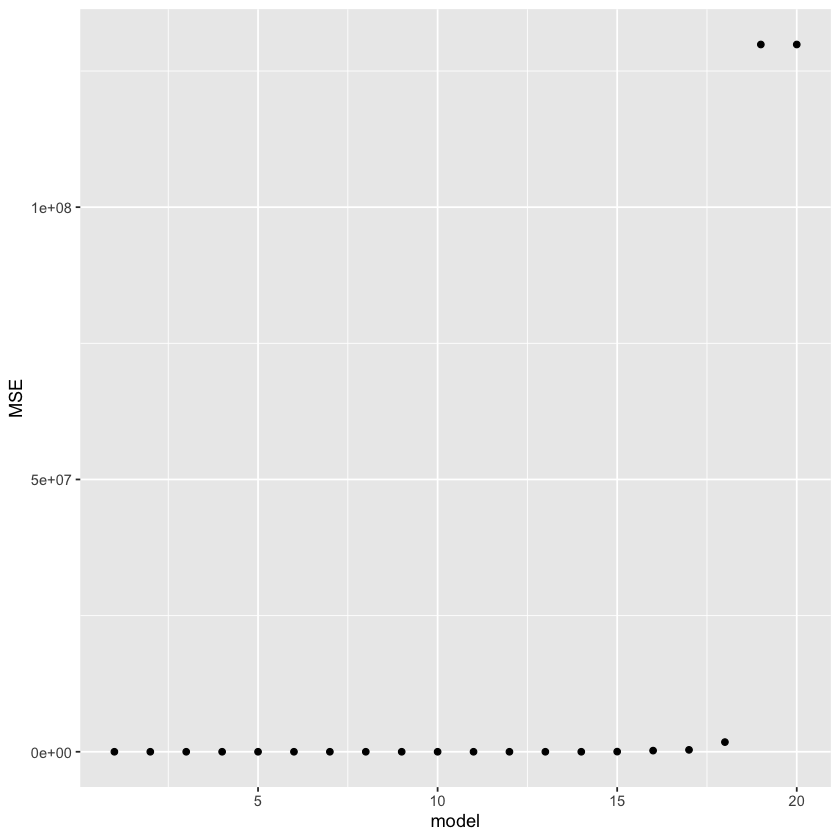

In [75]:
ggplot(aes(x = model, y = MSE), data = results) + geom_point()
min(results)

c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

> Based on the test MSEs, the best model is the model with 2 variables included.  This only includes one additional model to the actual model used to simulate the dataset.

**DUE:** 5pm EST, April 15th, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*